In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib

In [2]:
np.random.seed(1337)
data = datasets.make_circles(n_samples = 500, noise = 0.1, factor = 0.4)[0]

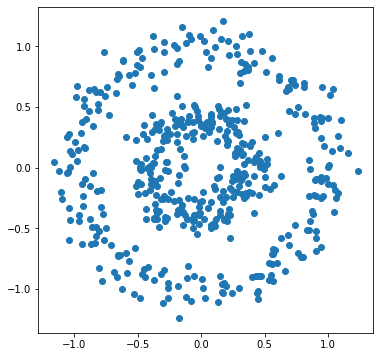

In [3]:
# Visualize data
%matplotlib inline

plt.figure(figsize = (6,6)) 
plt.scatter(data[:,0], data[:,1]) 
plt.show()

In [4]:
model = NearestNeighbors(n_neighbors = 4)
model.fit(data)

k_dists, indices = model.kneighbors(data)
max_distances = np.zeros(500)

for i in range(0, len(max_distances)):
    max_distances[i] = np.max(k_dists[i])

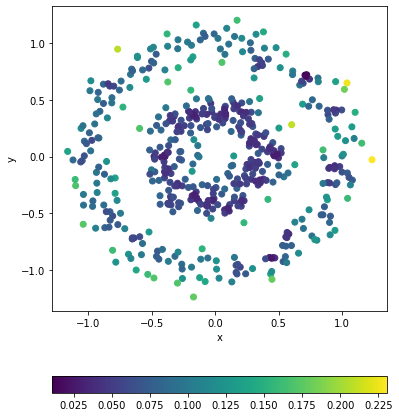

In [5]:
# Visualize
plt.figure(figsize=(6,8))
plt.scatter(data[:,0], data[:,1], c=max_distances)
plt.colorbar(orientation="horizontal")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
max_distances_sorted = np.sort(max_distances) # sorts ascending

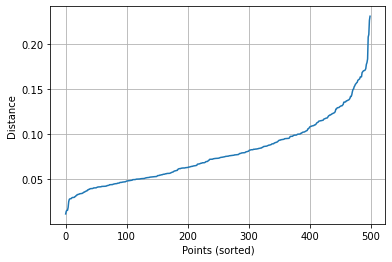

In [7]:
# Visualize
plt.plot(np.arange(0,500), max_distances_sorted)
plt.xlabel('Points (sorted)')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [8]:
epsilon = 0.15
lower = max_distances_sorted[max_distances_sorted < epsilon]
upper = max_distances_sorted[max_distances_sorted >= epsilon]
len(lower)+len(upper) == len(max_distances_sorted)

True

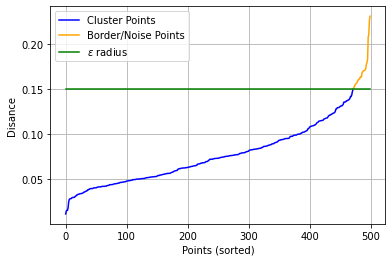

In [9]:
plt.plot(np.arange(0,len(lower)), lower, color="blue", label = "Cluster Points")
plt.plot(np.arange(len(lower),len(max_distances_sorted)), upper, color="orange", label = "Border/Noise Points")
plt.plot(np.arange(0,len(max_distances_sorted)), epsilon*np.ones(len(max_distances_sorted)), color="green", label = "$\epsilon$ radius")
plt.grid()
plt.xlabel('Points (sorted)')
plt.ylabel('Disance')
plt.legend()
plt.show()

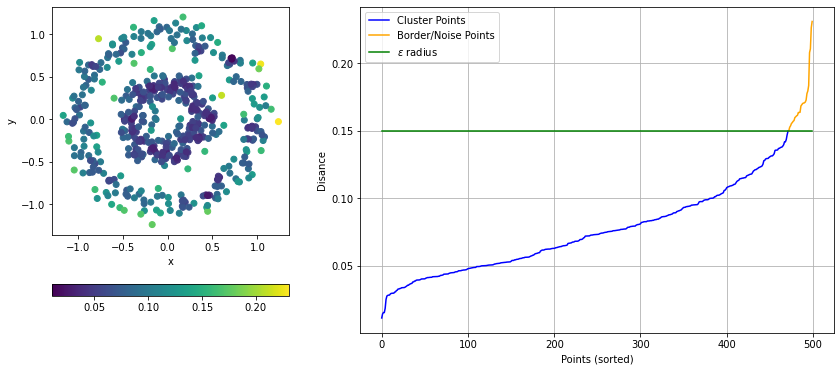

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),gridspec_kw={'width_ratios': [1, 2]})

pl1 = ax1.scatter(data[:,0], data[:,1], c=max_distances) 
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.colorbar(pl1, ax = ax1, orientation = "horizontal")

ax2.plot(np.arange(0,len(lower)), lower, color="blue", label = "Cluster Points")
ax2.plot(np.arange(len(lower),len(max_distances_sorted)), upper, color="orange", label = "Border/Noise Points")
ax2.plot(np.arange(0,len(max_distances_sorted)), epsilon*np.ones(len(max_distances_sorted)), color="green", label = "$\epsilon$ radius")
ax2.grid()
ax2.set_xlabel('Points (sorted)')
ax2.set_ylabel('Disance')
ax2.legend()
plt.show()

Apply DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan = DBSCAN(eps = epsilon, min_samples = 4)
dbscan.fit(data)

DBSCAN(eps=0.15, min_samples=4)

In [13]:
labels = dbscan.labels_

In [14]:
c1 = data[labels == 1]
c2 = data[labels == -1]
c3 = data[labels == 0]

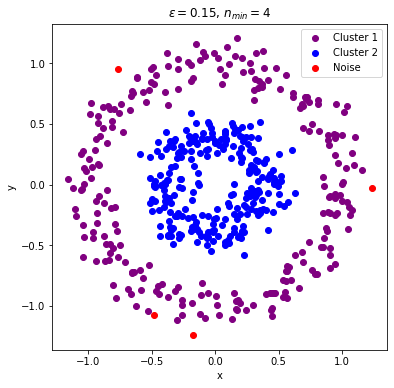

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(c3[:,0], c3[:,1], color="Purple", label = "Cluster 1")
plt.scatter(c1[:,0], c1[:,1], color="Blue", label = "Cluster 2")
plt.scatter(c2[:,0], c2[:,1], color="Red", label = "Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\epsilon = 0.15$, $n_{min} = 4$")
plt.legend()
plt.show()